In [169]:
from hmmlearn import hmm
import numpy as np
from sklearn.mixture.gmm import _validate_covars
import pandas as pd
from sklearn.preprocessing import scale,MinMaxScaler
import matplotlib.pyplot as plt

In [219]:
# 【各不相同】

# 读取数据设定隐态数量与制定指数名称
stock_data = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/SZZS080101-181101.csv',index_col=0)
n_components = 2
index_data_name = 'SZZS'

In [220]:
# 【各不相同】

# 抽取特征向量合并为一个数据框
open_p = stock_data['open']
close_p = stock_data['close']
volume = stock_data['volume']
money = stock_data['money']
ln_r = pd.DataFrame(np.log(close_p) - np.log(close_p.shift(1)))
ln_r.columns = ['lnR']
ln_r['lnR'][0]=0
X = pd.concat([open_p,close_p,volume,money,ln_r],axis=1)
# X = pd.concat([ln_r],axis=1)
# 结果 X 一定是一个类似特征向量矩阵的数据框

In [221]:
# 【完全相同】

# 数据预处理-标准化
# for x in X.columns:
#     X[x] = scale(X[x])

# 数据预处理-归一化
for x in X.columns:
    min_max = MinMaxScaler()
    X[x] = min_max.fit_transform(np.array(X[x]).reshape(-1,1))

In [222]:
# 【完全相同】

# 训练HMM模型
model = hmm.GaussianHMM(n_components=n_components, n_iter=10000, tol=1e-9,covariance_type="full")
model.fit(X)
decode = model.decode(X)

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [223]:
# 【各不相同】

# 设定隐态数量
H = pd.DataFrame(list(decode[1]))
H.columns=['Hidden']
H.index=X.index
X_H = pd.concat([X,H],axis=1)
# 三个隐态
X_H['clour'] = X_H['Hidden'].apply(lambda x: {0:'r',1:'g',2:'b'}[x])
# 二个隐态
# X_H['clour'] = X_H['Hidden'].apply(lambda x: {0:'r',1:'g'}[x])

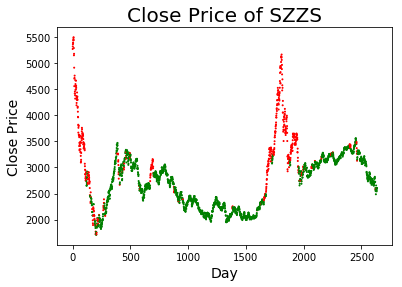

In [224]:
# 【完全相同】
# 绘图
plt.scatter(range(len(stock_data.index)),list(stock_data['close']), c=list(X_H['clour']),s=1)
 
# 设置图表标题并给坐标轴加上标签
plt.title('Close Price of '+index_data_name, fontsize=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

plt.show()